In [42]:
import pandas as pd
from math import sqrt;
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, mean_absolute_error, mean_squared_error, f1_score, log_loss
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 

In [43]:
#Importing Datasets 
malicious_dataset = pd.read_csv('malicious_flows.csv')
benign_dataset = pd.read_csv('sample_benign_flows.csv')

# Removing duplicated rows from benign_dataset (5380 rows removed)
benign_dataset = benign_dataset[benign_dataset.duplicated(keep=False) == False]

print(benign_dataset.duplicated(keep=False).value_counts())
print(malicious_dataset.duplicated(keep=False).value_counts())

# Combining both datasets together
all_flows = pd.concat([malicious_dataset, benign_dataset])

#Inspecting datasets for columns and rows with missing values
missing_values = all_flows.isnull().sum()
overall_percentage = (missing_values/all_flows.isnull().count())
print(overall_percentage)

# Reducing the size of the dataset to reduce the amount of time taken in training models
reduced_dataset = all_flows.sample(3000)

# Examining the distribution of Malicious and Benign flows in the reduced dataset 
print(reduced_dataset['isMalware'].value_counts())

False    22295
dtype: int64
False    16467
dtype: int64
Src_Port     0.000000
Dst_Port     0.000000
Bytes_in     0.000000
Bytes_out    0.000000
Pkts_in      0.000000
               ...   
95           0.424823
96           0.424823
97           0.424823
98           0.424823
99           0.424823
Length: 504, dtype: float64
0    1741
1    1259
Name: isMalware, dtype: int64


In [3]:
# Isolating independent and dependent variables for training dataset
reduced_y = reduced_dataset['isMalware']
reduced_x = reduced_dataset.drop(['isMalware'], axis=1);

x_train, x_test, y_train, y_test = train_test_split(reduced_x, reduced_y, test_size=0.2, random_state=42)
reduced_x.head()

,Src_Port,Dst_Port,Bytes_in,Bytes_out,Pkts_in,Pkts_out,entropy,byte_dist_std,byte_dist_mn,num_of_exts,...,90,91,92,93,94,95,96,97,98,99
20378,53934,443,1813,1030,9,13,4.021067,58.127056,98.728456,7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
14004,35209,443,1736,981,7,15,3.967554,57.486666,95.138020,7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8592,49201,443,1027,544,7,6,7.492994,56.059687,98.781031,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12569,46573,8443,2645,643,7,15,7.840786,64.561118,116.616788,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18785,36323,8443,2645,643,7,15,7.839074,63.701409,117.440998,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Training random forest classifier
rf_clf = RandomForestClassifier(max_depth=100)
rf_clf.fit(x_train, y_train) 
rf_prediction = rf_clf.predict(x_test)
conf_m = confusion_matrix(y_test, rf_prediction)  
print(conf_m)
print('Random Forest Classifier Accuracy score: ', accuracy_score(y_test, rf_prediction))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [4]:
x_train.shape

(2400, 503)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(reduced_x)

In [6]:
X_new = pd.DataFrame(X_scaled, columns=reduced_x.columns)
X_new.head()

,Src_Port,Dst_Port,Bytes_in,Bytes_out,Pkts_in,Pkts_out,entropy,byte_dist_std,byte_dist_mn,num_of_exts,...,90,91,92,93,94,95,96,97,98,99
0,1.322435,-0.529347,-0.280229,-0.152955,-0.172766,-0.157326,-0.855707,-0.591108,-0.898977,0.957668,...,0.902888,0.902888,0.906076,0.907141,0.903950,0.902888,0.902888,0.903950,0.903950,0.903950
1,-1.492935,-0.529347,-0.289023,-0.167698,-0.256430,-0.065457,-0.877331,-0.735063,-1.276226,0.957668,...,0.902888,0.902888,0.906076,0.907141,0.903950,0.902888,0.902888,0.903950,0.903950,0.903950
2,0.610812,-0.529347,-0.369997,-0.299184,-0.256430,-0.478867,0.547243,-1.055839,-0.893453,-0.619173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.215683,0.960347,-0.185208,-0.269397,-0.256430,-0.065457,0.687781,0.855227,0.980561,-0.093559,...,-1.107558,-1.107558,-1.103660,-1.102364,-1.106256,-1.107558,-1.107558,-1.106256,-1.106256,-1.106256
4,-1.325441,0.960347,-0.185208,-0.269397,-0.256430,-0.065457,0.687089,0.661970,1.067161,-0.093559,...,-1.107558,-1.107558,-1.103660,-1.102364,-1.106256,-1.107558,-1.107558,-1.106256,-1.106256,-1.106256


In [7]:
malicious_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16467 entries, 0 to 16466
Columns: 439 entries, Src_Port to isMalware
dtypes: float64(3), int64(436)
memory usage: 55.2 MB


In [8]:
malicious_dataset.isnull().sum()

Src_Port     0
Dst_Port     0
Bytes_in     0
Bytes_out    0
Pkts_in      0
            ..
sg_24        0
sg_25        0
ec_pts_0     0
ec_pts_1     0
isMalware    0
Length: 439, dtype: int64

In [9]:
#Function to plot most important features of random forest model

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.ylim(0, 50)
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

/Users/megencochran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


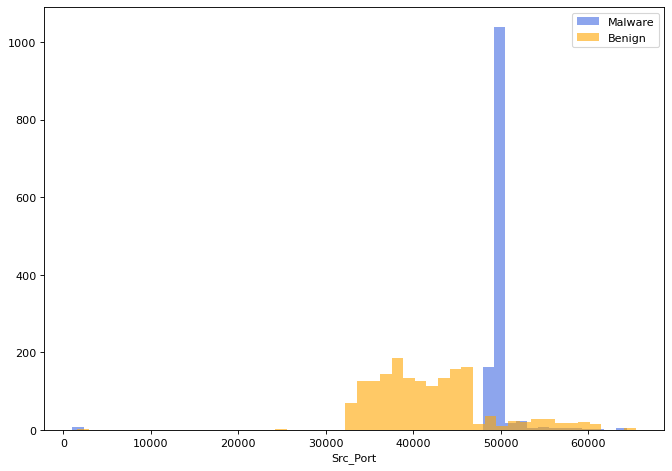

In [10]:
x1 = reduced_dataset.loc[reduced_dataset.isMalware==1, 'Src_Port']
x2 = reduced_dataset.loc[reduced_dataset.isMalware==0, 'Src_Port']

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="royalblue", label="Malware", **kwargs, kde=False)
sns.distplot(x2, color="orange", label="Benign", **kwargs, kde=False)

plt.legend();
plt.show()

In [11]:
all_flows = pd.concat([malicious_dataset, benign_dataset])

TypeError: scatter() missing 1 required positional argument: 'y'

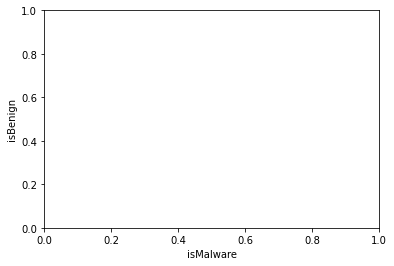

In [12]:
%matplotlib inLine
plt.xlabel('isMalware')
plt.ylabel('isBenign')
plt.scatter(reduced_dataset, color="blue",marker='+')

In [13]:
reduced_dataset.head()

,Src_Port,Dst_Port,Bytes_in,Bytes_out,Pkts_in,Pkts_out,entropy,byte_dist_std,byte_dist_mn,num_of_exts,...,90,91,92,93,94,95,96,97,98,99
20378,53934,443,1813,1030,9,13,4.021067,58.127056,98.728456,7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
14004,35209,443,1736,981,7,15,3.967554,57.486666,95.138020,7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8592,49201,443,1027,544,7,6,7.492994,56.059687,98.781031,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12569,46573,8443,2645,643,7,15,7.840786,64.561118,116.616788,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18785,36323,8443,2645,643,7,15,7.839074,63.701409,117.440998,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
reduced_dataset.shape

(3000, 504)

In [15]:
reduced_dataset.describe

<bound method NDFrame.describe of        Src_Port  Dst_Port  Bytes_in  Bytes_out  Pkts_in  Pkts_out   entropy  \
20378     53934       443      1813       1030        9        13  4.021067   
14004     35209       443      1736        981        7        15  3.967554   
8592      49201       443      1027        544        7         6  7.492994   
12569     46573      8443      2645        643        7        15  7.840786   
18785     36323      8443      2645        643        7        15  7.839074   
...         ...       ...       ...        ...      ...       ...       ...   
23406     33953       443      2414       1305        6        16  4.158802   
3790      56128       443      1542        643        4        10  7.182002   
6368      36743       443      1813        988        9        17  4.014154   
2582      49381       443      1058        548        7         8  7.560372   
15405     49411       443      2112         90        4         3  7.506337   

       byte_dist_

In [17]:
x_train.shape

(2400, 503)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(reduced_x, reduced_y, test_size=0.2, random_state=42)

In [19]:
reduced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 20378 to 15405
Columns: 504 entries, Src_Port to 99
dtypes: float64(133), int64(371)
memory usage: 11.6 MB


In [20]:
data_object = reduced_dataset.select_dtypes('object')
print('object shape ',data_object.shape)
data_num = reduced_dataset.select_dtypes(['int64','float64'])
print('num shape ',data_num.shape)

object shape  (3000, 0)
num shape  (3000, 504)


In [21]:
data_num.describe()

,Src_Port,Dst_Port,Bytes_in,Bytes_out,Pkts_in,Pkts_out,entropy,byte_dist_std,byte_dist_mn,num_of_exts,...,90,91,92,93,94,95,96,97,98,99
count,3000.000000,3000.0000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,...,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,45138.496667,3285.7140,4266.667667,1538.353333,13.130000,16.42500,6.138713,60.756617,107.284386,5.178000,...,0.550902,0.550902,0.549156,0.548575,0.550320,0.550902,0.550902,0.550320,0.550320,0.550320
std,6652.100254,5371.1265,8757.400669,3324.102654,23.909112,21.77377,2.475145,4.449272,9.518997,1.902855,...,0.497547,0.497547,0.497723,0.497780,0.497606,0.497547,0.497547,0.497606,0.497606,0.497606
min,1039.000000,22.0000,305.000000,90.000000,3.000000,3.00000,0.392513,51.375582,77.724719,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39718.500000,443.0000,1596.000000,643.000000,7.000000,9.00000,4.020463,57.723705,100.182507,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48288.000000,443.0000,1803.000000,976.000000,8.000000,15.00000,7.562513,60.126776,107.283647,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,49356.000000,8343.0000,2761.000000,1124.250000,10.000000,15.00000,7.750611,62.288779,113.087689,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,65499.000000,44443.0000,64971.000000,63429.000000,247.000000,248.00000,62.648529,75.842669,127.706301,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
missing_counts = pd.DataFrame(reduced_dataset.isnull().sum().sort_values(ascending=False))
missing_columns = missing_counts[missing_counts.iloc[:,0]>0]
missing_columns

,0
0096,1719
0035,1719
0095,1719
0097,1719
0098,1719
...,...
40,1281
41,1281
42,1281
43,1281


In [26]:
plt.figure(figsize=(400,100))
missing_columns = missing_counts[missing_counts.iloc[:,0]>0]
sns.barplot(x=missing_columns.index,y=missing_columns.iloc[:,0])
plt.xticks(rotation=90)
plt.show()

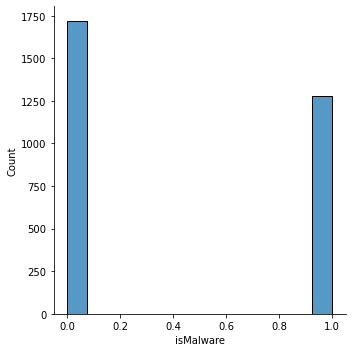

In [32]:
sns.displot(reduced_dataset['isMalware']);